# 4 一元线性回归

## 4.1 一元线性回归模型

### 明瑟方程

$\ln w = \alpha + \beta s + \epsilon$

In [28]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [29]:
# 读取grilic.dta数据

import pandas as pd

grilic = pd.read_stata('../2_Data/Data-2e/grilic.dta')
grilic.head()


,rns,mrt,smsa,med,iq,kww,age,s,expr,tenure,lnw
0,0,0,1,8,93,35,19,12,0.462,0,5.900
1,0,0,1,14,119,41,23,16,0.000,2,5.438
2,0,0,1,14,108,46,20,14,0.423,1,5.710
3,0,0,1,12,96,32,18,12,0.333,1,5.481
4,0,1,1,6,74,27,26,9,9.013,3,5.927


In [30]:
# 数据集中有很多字段（变量，列的名称），我们只需要对lnw和s进行分析。
grilic[['s','lnw']].head(10)

,s,lnw
0,12,5.900
1,16,5.438
2,14,5.710
3,12,5.481
4,9,5.927
5,9,4.804
6,18,6.512
7,15,5.808
8,12,5.737
9,18,6.382


In [31]:
# 一元线性回归模型只需要用到‘lnw’和‘s’两个字段

grilic_to_ols = sm.OLS(endog=grilic['lnw'], 
                       exog=grilic['s'],
                       hasconst=True).fit()
print(grilic_to_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                      -2.574
Model:                            OLS   Adj. R-squared:                 -2.574
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                nan
Time:                        11:45:11   Log-Likelihood:                -916.23
No. Observations:                 758   AIC:                             1834.
Df Residuals:                     757   BIC:                             1839.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
s              0.4154      0.002    191.644      0.0

<Axes: xlabel='s', ylabel='lnw'>

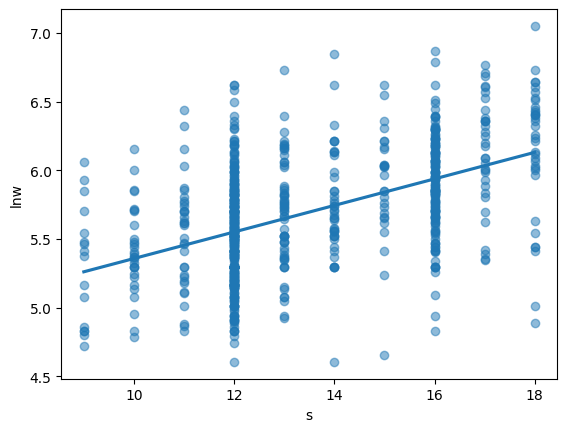

In [32]:
# 对上面的回归结果进行绘图

sns.regplot(x="s", y="lnw", 
            data=grilic, 
            ci=None, 
            scatter_kws={"alpha": 0.5})
